This is a copy of Benjamin Sorensen's blog post about using redist, which you can find here: https://www.benjaminsorensen.me/post/mt-redistricting/

In [1]:
library(sf)
library(ggplot2)
library(tidyverse)
library(tibble)
library(magrittr)
library(redist)
library(sp)
library(spData)
library(spdep)
library(igraph)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from

In [2]:
va_2015_file <- "C:/Users/madie/OneDrive/data/pre-redist/VA_precinct_2015/VA_precinct_2015.shp"
df <- st_read(va_2015_file)

Reading layer `VA_precinct_2015' from data source `C:\Users\madie\OneDrive\data\pre-redist\VA_precinct_2015\VA_precinct_2015.shp' using driver `ESRI Shapefile'
Simple feature collection with 2577 features and 14 fields
geometry type:  MULTIPOLYGON
dimension:      XYZ
bbox:           xmin: 9963623 ymin: 6151696 xmax: 12442960 ymax: 7217011
z_range:        zmin: 0 zmax: 0
projected CRS:  NAD83 / Virginia North (ftUS)


In [3]:
adjlist <- spdep::poly2nb(df, queen = FALSE)

In [4]:
# much faster for st_distance to use centroids rather than polygons
distmat <- 
  df %>% 
  mutate(centroid = st_centroid(geometry)) %>% 
  st_set_geometry(value = "centroid") %>% 
  select(-geometry) %>% 
  st_distance()

In [6]:
start.time <- Sys.time()
alg_mcmc <- redist.mcmc(
  adjobj = adjlist,
  popvec = df$pop,
#  initcds = initcds$cd_ns, I dont' have initial districts I'm starting with
  maxiterrsg = 1e8,
  ndists = 11,
  nsims = 10000,
  constraint = c("population", "compact"),
  constraintweights = c(1, 1),
  popcons = .1,
  ssdmat = distmat,
  savename = "redist.mcmc.2015"
) %>% 
  invisible()
end.time <- Sys.time()
print(end.time - start.time)


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.


Using redist.rsg() to generate starting values.

10 percent done.
Metropolis acceptance ratio: 0.317317

20 percent done.
Metropolis acceptance ratio: 0.235118

30 percent done.
Metropolis acceptance ratio: 0.198066

40 percent done.
Metropolis acceptance ratio: 0.175794

50 percent done.
Metropolis acceptance ratio: 0.156631

60 percent done.
Metropolis acceptance ratio: 0.13969

70 percent done.
Metropolis acceptance ratio: 0.128304

80 percent done.
Metropolis acceptance ratio: 0.12089

90 percent done.
Metropolis acceptance ratio: 0.112124

100 percent done.
Metropolis acceptance ratio: 0.106511

Time difference of 33.45871 mins


In [14]:
df$row_n <- seq.int(nrow(df))

In [15]:
df

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,demvote,repvote,pop,TotPop,BlackPop,HispPop,VAP,BlackVAP,HispVAP,geometry,row_n
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [US_survey_foot]>,<int>
1,003,Albemarle County,000202,University Hall,057,221,0,2214,2214,238.953048,99.6904759,1905.03243,182.989270,58.12330429,MULTIPOLYGON Z (((11474704 ...,1
2,001,Accomack County,000101,Chincoteague,100,178,703,1122,1122,22.000000,14.9987358,944.65647,10.000000,13.00884956,MULTIPOLYGON Z (((12370064 ...,2
3,001,Accomack County,000201,Atlantic,100,67,339,353,353,122.759148,23.6324050,275.77984,109.517522,3.69688328,MULTIPOLYGON Z (((12319940 ...,3
4,001,Accomack County,000202,Greenbackville,100,97,306,745,745,162.640845,0.0000000,527.14621,74.949698,0.00000000,MULTIPOLYGON Z (((12348276 ...,4
5,001,Accomack County,000301,Oak Hall,100,221,269,819,819,273.262302,56.4241781,596.60282,205.176128,8.74507876,MULTIPOLYGON Z (((12304919 ...,5
6,001,Accomack County,000401,Bloxom,100,48,215,410,410,47.237042,54.5418996,305.65955,38.068813,17.81722287,MULTIPOLYGON Z (((12286551 ...,6
7,001,Accomack County,000402,Parksley,100,80,357,733,733,155.327075,47.7326692,531.10806,104.501666,1.38725490,MULTIPOLYGON Z (((12270326 ...,7
8,001,Accomack County,000403,Saxis,100,16,98,211,211,37.301566,3.1065155,171.45409,28.444103,0.09473684,MULTIPOLYGON Z (((12261443 ...,8
9,001,Accomack County,000501,Mappsville,100,129,201,733,733,388.773079,128.3451360,458.43132,275.210165,10.13809911,MULTIPOLYGON Z (((12312709 ...,9


In [21]:
cd_1 <- 
    alg_mcmc$partitions %>%
        as_tibble() %>%
        mutate(row_n = row_number()) %>%
        rowwise() %>%
        mutate(p_cd = sum(c_across(V1:V10000) == 1)/10000) %>%
        nest(cols = starts_with("V")) %>%
        inner_join(df, by = "row_n") %>%
        st_as_sf() 

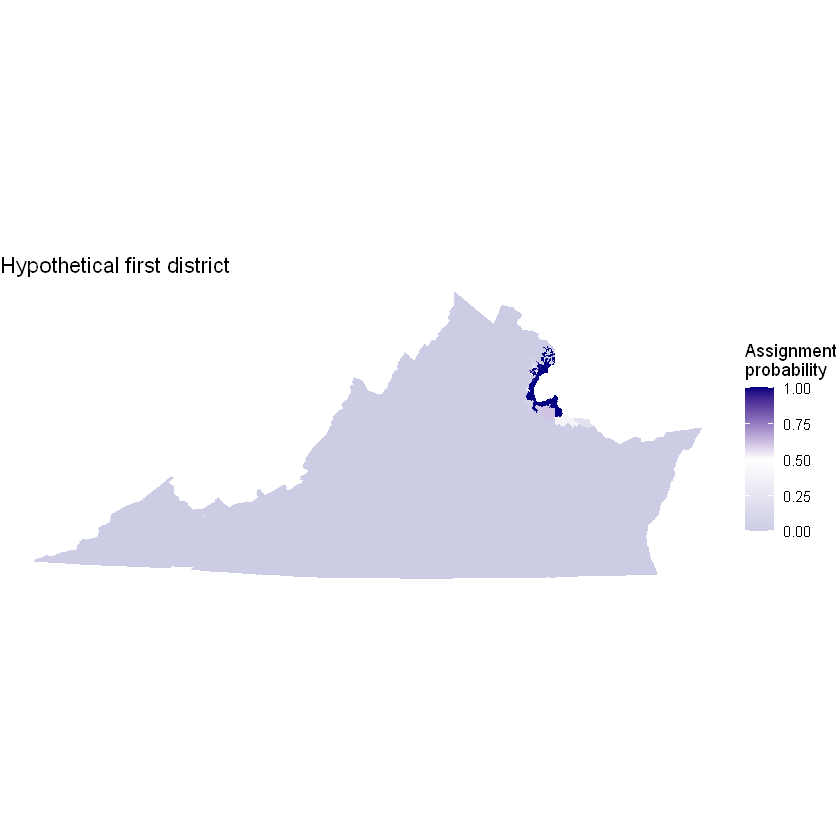

In [28]:
plot_1 <- cd_1 %>%        
    ggplot(aes(fill = p_cd)) +
        geom_sf(size = 0, color = NA) +
        scale_fill_gradient2(low = "#cccce5", high = "#000080", midpoint = .5) +
        coord_sf(datum = NA) +
        theme_void() + 
        labs(
            title = "Hypothetical first district",
            fill = "Assignment\nprobability"
        )
plot_1

In [29]:
cd_2 <- 
    alg_mcmc$partitions %>%
        as_tibble() %>%
        mutate(row_n = row_number()) %>%
        rowwise() %>%
        mutate(p_cd = sum(c_across(V1:V10000) == 2)/10000) %>%
        nest(cols = starts_with("V")) %>%
        inner_join(df, by = "row_n") %>%
        st_as_sf() 

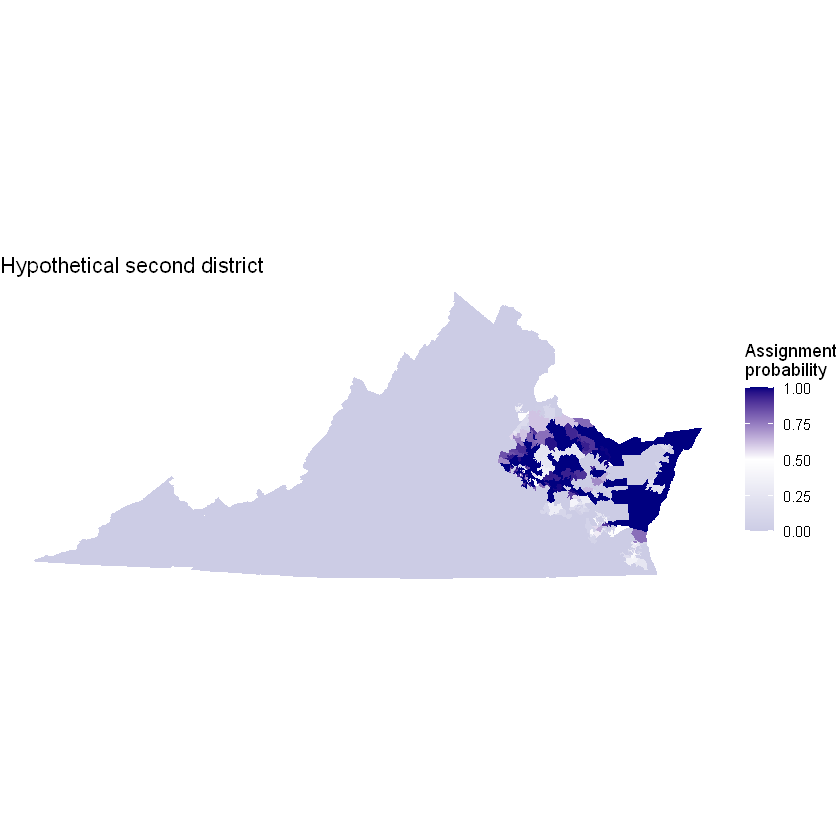

In [30]:
plot_2 <- cd_2 %>%        
    ggplot(aes(fill = p_cd)) +
        geom_sf(size = 0, color = NA) +
        scale_fill_gradient2(low = "#cccce5", high = "#000080", midpoint = .5) +
        coord_sf(datum = NA) +
        theme_void() + 
        labs(
            title = "Hypothetical second district",
            fill = "Assignment\nprobability"
        )
plot_2

In [13]:
rownames(df)

[1] "1"    "2"    "3"    "4"    "5"    "6"    "7"    "8"    "9"    "10"  
  [11] "11"   "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "20"  
  [21] "21"   "22"   "23"   "24"   "25"   "26"   "27"   "28"   "29"   "30"  
  [31] "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"   "40"  
  [41] "41"   "42"   "43"   "44"   "45"   "46"   "47"   "48"   "49"   "50"  
  [51] "51"   "52"   "53"   "54"   "55"   "56"   "57"   "58"   "59"   "60"  
  [61] "61"   "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "70"  
  [71] "71"   "72"   "73"   "74"   "75"   "76"   "77"   "78"   "79"   "80"  
  [81] "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"   "90"  
  [91] "91"   "92"   "93"   "94"   "95"   "96"   "97"   "98"   "99"   "100" 
 [101] "101"  "102"  "103"  "104"  "105"  "106"  "107"  "108"  "109"  "110" 
 [111] "111"  "112"  "113"  "114"  "115"  "116"  "117"  "118"  "119"  "120" 
 [121] "121"  "122"  "123"  "124"  "125"  "126"  "127"  "128"  "129"  "130" 
 [131] "131"  "132"  "133"  "134"  "135"  "136"  "137"  "138"  "139"  "140" 
 [141] "141"  "142"  "143"  "144"  "145"  "146"  "147"  "148"  "149"  "150" 
 [151] "151"  "152"  "153"  "154"  "155"  "156"  "157"  "158"  "159"  "160" 
 [161] "161"  "162"  "163"  "164"  "165"  "166"  "167"  "168"  "169"  "170" 
 [171] "171"  "172"  "173"  "174"  "175"  "176"  "177"  "178"  "179"  "180" 
 [181] "181"  "182"  "183"  "184"  "185"  "186"  "187"  "188"  "189"  "190" 
 [191] "191"  "192"  "193"  "194"  "195"  "196"  "197"  "198"  "199"  "200" 
 [201] "201"  "202"  "203"  "204"  "205"  "206"  "207"  "208"  "209"  "210" 
 [211] "211"  "212"  "213"  "214"  "215"  "216"  "217"  "218"  "219"  "220" 
 [221] "221"  "222"  "223"  "224"  "225"  "226"  "227"  "228"  "229"  "230" 
 [231] "231"  "232"  "233"  "234"  "235"  "236"  "237"  "238"  "239"  "240" 
 [241] "241"  "242"  "243"  "244"  "245"  "246"  "247"  "248"  "249"  "250" 
 [251] "251"  "252"  "253"  "254"  "255"  "256"  "257"  "258"  "259"  "260" 
 [261] "261"  "262"  "263"  "264"  "265"  "266"  "267"  "268"  "269"  "270" 
 [271] "271"  "272"  "273"  "274"  "275"  "276"  "277"  "278"  "279"  "280" 
 [281] "281"  "282"  "283"  "284"  "285"  "286"  "287"  "288"  "289"  "290" 
 [291] "291"  "292"  "293"  "294"  "295"  "296"  "297"  "298"  "299"  "300" 
 [301] "301"  "302"  "303"  "304"  "305"  "306"  "307"  "308"  "309"  "310" 
 [311] "311"  "312"  "313"  "314"  "315"  "316"  "317"  "318"  "319"  "320" 
 [321] "321"  "322"  "323"  "324"  "325"  "326"  "327"  "328"  "329"  "330" 
 [331] "331"  "332"  "333"  "334"  "335"  "336"  "337"  "338"  "339"  "340" 
 [341] "341"  "342"  "343"  "344"  "345"  "346"  "347"  "348"  "349"  "350" 
 [351] "351"  "352"  "353"  "354"  "355"  "356"  "357"  "358"  "359"  "360" 
 [361] "361"  "362"  "363"  "364"  "365"  "366"  "367"  "368"  "369"  "370" 
 [371] "371"  "372"  "373"  "374"  "375"  "376"  "377"  "378"  "379"  "380" 
 [381] "381"  "382"  "383"  "384"  "385"  "386"  "387"  "388"  "389"  "390" 
 [391] "391"  "392"  "393"  "394"  "395"  "396"  "397"  "398"  "399"  "400" 
 [401] "401"  "402"  "403"  "404"  "405"  "406"  "407"  "408"  "409"  "410" 
 [411] "411"  "412"  "413"  "414"  "415"  "416"  "417"  "418"  "419"  "420" 
 [421] "421"  "422"  "423"  "424"  "425"  "426"  "427"  "428"  "429"  "430" 
 [431] "431"  "432"  "433"  "434"  "435"  "436"  "437"  "438"  "439"  "440" 
 [441] "441"  "442"  "443"  "444"  "445"  "446"  "447"  "448"  "449"  "450" 
 [451] "451"  "452"  "453"  "454"  "455"  "456"  "457"  "458"  "459"  "460" 
 [461] "461"  "462"  "463"  "464"  "465"  "466"  "467"  "468"  "469"  "470" 
 [471] "471"  "472"  "473"  "474"  "475"  "476"  "477"  "478"  "479"  "480" 
 [481] "481"  "482"  "483"  "484"  "485"  "486"  "487"  "488"  "489"  "490" 
 [491] "491"  "492"  "493"  "494"  "495"  "496"  "497"  "498"  "499"  "500" 
 [501] "501"  "502"  "503"  "504"  "505"  "506"  "507"  "508"  "509"  "510" 
 [511] "511"  "512"  "513"  "514"  "515"  "516"  "517"  "518"  "519"  "520" 